In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pyod.models.ae1svm import AE1SVM

normal_path = "transients/S01/1/Normal/q_data"
relay_path  = "transients/S01/1/Relay/q_data"

with h5py.File("datasets/transients_cleaned_padded.h5", "r") as f:
    normal_group = f[normal_path]
    relay_group  = f[relay_path]

    n_norm = normal_group["0"].shape[0]
    n_relay = relay_group["0"].shape[0]

    dataset_normal = np.zeros((49666, n_norm))
    dataset_relay  = np.zeros((49666, n_relay))

    for i in range(49666):
        try:
            dataset_normal[i] = normal_group[str(i)][:]
        except KeyError:
            continue

    for i in range(49666):
        try:
            dataset_relay[i] = relay_group[str(i)][:]
        except KeyError:
            continue

scalerMinMax = MinMaxScaler()
scalerStandard = StandardScaler()

X_train               = dataset_normal[:47500]
X_test_normal         = dataset_normal[47500:]
X_test_relay          = dataset_relay[47500:]

scalerMinMax.fit(X_train)
X_train_scaled_minmax       = scalerMinMax.transform(X_train)
X_test_norm_scaled_minmax   = scalerMinMax.transform(X_test_normal)
X_test_relay_scaled_minmax  = scalerMinMax.transform(X_test_relay)

scalerStandard.fit(X_train)
X_train_scaled_standard        = scalerStandard.transform(X_train)
X_test_norm_scaled_standard    = scalerStandard.transform(X_test_normal)
X_test_relay_scaled_standard   = scalerStandard.transform(X_test_relay)

X_test_combined = np.vstack((X_test_normal, X_test_relay))
X_test_combined_scaled_minmax = np.vstack((X_test_norm_scaled_minmax, X_test_relay_scaled_minmax))
X_test_combined_scaled_standard = np.vstack((X_test_norm_scaled_standard, X_test_relay_scaled_standard))

y_true = np.array([0] * len(X_test_normal) + [1] * len(X_test_relay))

Epoch 10/50, Loss: 0.6083288759093494
Epoch 20/50, Loss: 0.5831788512793454
Epoch 30/50, Loss: 0.573252450215696
Epoch 40/50, Loss: 0.5695200839026608
Epoch 50/50, Loss: 0.566578248474333
hidden neurons (64, 32)
nu 0.05
dropout rate 0.05

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.99      0.67      2166
       Relay       0.81      0.04      0.08      2166

    accuracy                           0.52      4332
   macro avg       0.66      0.52      0.38      4332
weighted avg       0.66      0.52      0.38      4332



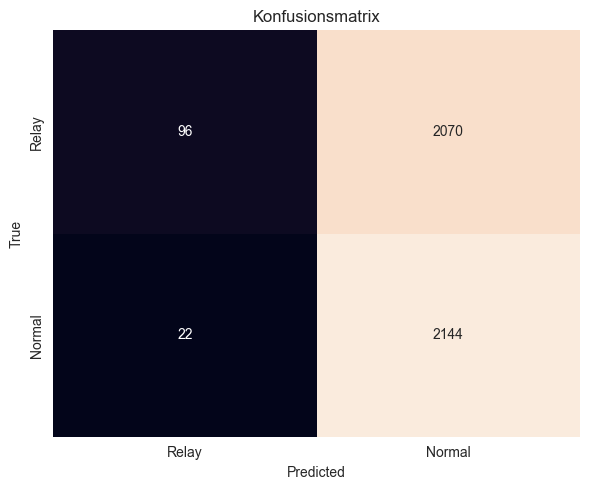

Epoch 10/50, Loss: 0.6282441445472666
Epoch 20/50, Loss: 0.6019236551992821
Epoch 30/50, Loss: 0.5936635783425084
Epoch 40/50, Loss: 0.5909709384144356
Epoch 50/50, Loss: 0.588601147807407
hidden neurons (64, 32)
nu 0.05
dropout rate 0.1

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.99      0.67      2166
       Relay       0.83      0.05      0.09      2166

    accuracy                           0.52      4332
   macro avg       0.67      0.52      0.38      4332
weighted avg       0.67      0.52      0.38      4332



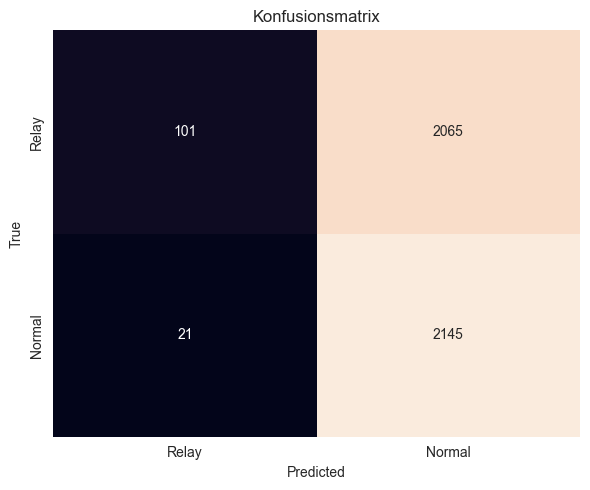

Epoch 10/50, Loss: 0.6654646427141697
Epoch 20/50, Loss: 0.6339743907403464
Epoch 30/50, Loss: 0.6261758608850164
Epoch 40/50, Loss: 0.6221189051766187
Epoch 50/50, Loss: 0.6202630505417333
hidden neurons (64, 32)
nu 0.05
dropout rate 0.2

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.99      0.67      2166
       Relay       0.83      0.05      0.10      2166

    accuracy                           0.52      4332
   macro avg       0.67      0.52      0.38      4332
weighted avg       0.67      0.52      0.38      4332



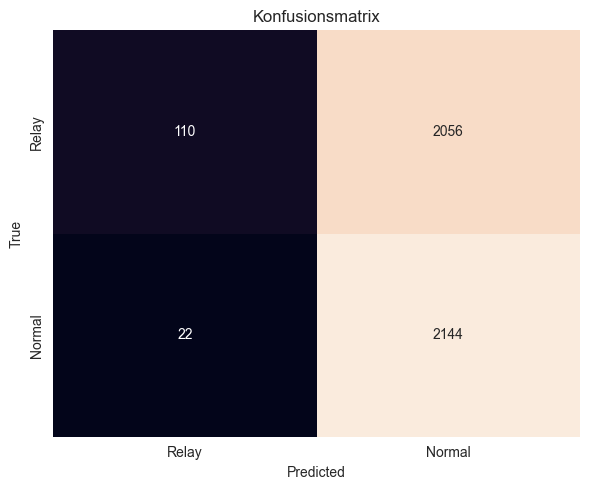

Epoch 10/50, Loss: 0.6065373287457809
Epoch 20/50, Loss: 0.5819704193659503


KeyboardInterrupt: 

In [4]:
for n in {(64,32), (128,64), (256,128)}:
    for i in {0.05, 0.1, 0.2}:
        for d in {0.05, 0.1, 0.2}:
            clf = AE1SVM(contamination=0.01, hidden_neurons=n, nu=i, dropout_rate=d)
            clf.fit(X_train)

            # pyod.predict: 0 = inlier, 1 = outlier
            y_pred = clf.predict(X_test_combined)

            # cm und report
            cm = confusion_matrix(y_true, y_pred, labels=[1,0])
            print(f"hidden neurons {n}")
            print(f"nu {i}")
            print(f"dropout rate {d}")
            print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

            # plot
            plt.figure(figsize=(6,5))
            sns.heatmap(cm, annot=True, fmt="d",
                        xticklabels=["Relay","Normal"],
                        yticklabels=["Relay","Normal"],
                        cbar=False)
            plt.xlabel("Predicted")
            plt.ylabel("True")
            plt.title("Konfusionsmatrix")
            plt.tight_layout()
            plt.show()

Epoch 10/50, Loss: 0.6097442385925589
Epoch 20/50, Loss: 0.5839018880718886
Epoch 30/50, Loss: 0.5718036380079058
Epoch 40/50, Loss: 0.5646382918863585
Epoch 50/50, Loss: 0.5630823457281197
hidden neurons (64, 32)
nu 0.05
dropout rate 0.05

Classification Report:
               precision    recall  f1-score   support

      Normal       0.51      0.99      0.67      2166
       Relay       0.82      0.04      0.08      2166

    accuracy                           0.52      4332
   macro avg       0.66      0.52      0.38      4332
weighted avg       0.66      0.52      0.38      4332



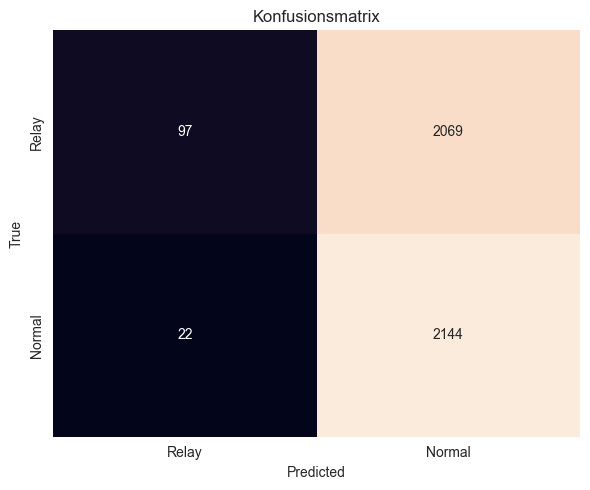

KeyboardInterrupt: 

In [5]:
for n in {(64,32), (128,64), (256,128)}:
    for i in {0.05, 0.1, 0.2}:
        for d in {0.05, 0.1, 0.2}:
            clf = AE1SVM(contamination=0.01, hidden_neurons=n, nu=i, dropout_rate=d)
            clf.fit(X_train_scaled_standard)

            # pyod.predict: 0 = inlier, 1 = outlier
            y_pred = clf.predict(X_test_combined_scaled_standard)

            # cm und report
            cm = confusion_matrix(y_true, y_pred, labels=[1,0])
            print(f"hidden neurons {n}")
            print(f"nu {i}")
            print(f"dropout rate {d}")
            print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

            # plot
            plt.figure(figsize=(6,5))
            sns.heatmap(cm, annot=True, fmt="d",
                        xticklabels=["Relay","Normal"],
                        yticklabels=["Relay","Normal"],
                        cbar=False)
            plt.xlabel("Predicted")
            plt.ylabel("True")
            plt.title("Konfusionsmatrix")
            plt.tight_layout()
            plt.show()

In [ ]:
for n in {(64,32), (128,64), (256,128)}:
    for i in {0.05, 0.1, 0.2}:
        for d in {0.05, 0.1, 0.2}:
            clf = AE1SVM(contamination=0.01, hidden_neurons=n, nu=i, dropout_rate=d)
            clf.fit(X_train_scaled_minmax)

            # pyod.predict: 0 = inlier, 1 = outlier
            y_pred = clf.predict(X_test_combined_scaled_minmax)

            # cm und report
            cm = confusion_matrix(y_true, y_pred, labels=[1,0])
            print(f"hidden neurons {n}")
            print(f"nu {i}")
            print(f"dropout rate {d}")
            print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=["Normal","Relay"]))

            # plot
            plt.figure(figsize=(6,5))
            sns.heatmap(cm, annot=True, fmt="d",
                        xticklabels=["Relay","Normal"],
                        yticklabels=["Relay","Normal"],
                        cbar=False)
            plt.xlabel("Predicted")
            plt.ylabel("True")
            plt.title("Konfusionsmatrix")
            plt.tight_layout()
            plt.show()